## Tutorial 01 - Linear Regression and Logistic Regression

**Objectives:**

* To develop basic Julia programming skills.
* To understand linear regression and least square.
* To understand logistic regression and gradient descend.


**Instructions:**   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab1.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab1.ipynb" file
* Complete exercises in "lab1.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next

**Authors:** 
* Kloe and Lydia 

## 1. Introduction to Julia

### 1.1 Printing

In [1]:
"""
Introduction to Julia
"""

println(5) # println automatically append \n to the statement while print not

5


In [2]:
using Printf
@printf "%d %d %s %s" 1 16 1/16 "text"
# Should be 1 16 1/16 "text"

1 16 0.0625 text

In [3]:
# @printf allows number formatting but does not automatically append the \n to statements
@printf "1 divided by 16 is %f\n" (1/16)
@printf "1 divided by 16 is %.2f\n" (1/16)
@printf "1 divided by 16 is %.2f and 1 divided by 32 is %.2f\n" (1/16) (1/32)

println("1 divided by 16 is $(1/16)")

1 divided by 16 is 0.062500
1 divided by 16 is 0.06
1 divided by 16 is 0.06 and 1 divided by 32 is 0.03
1 divided by 16 is 0.0625


### 1.2 Numbers and Variables

String, integer, float and bool (logical) variables are ubiquitous data types in Julia.

In [4]:
var1 = "Welcome to COMP5318" 
println(var1, " is ", typeof(var1)) 

var2 = 10
println(var2, " is ", typeof(var2))

var3 = 10.0 
println(var3, " is ", typeof(var3))

var4 = true
println(var4, " is ", typeof(var4))

Welcome to COMP5318 is String
10 is Int64
10.0 is Float64
true is Bool


### 1.3 Lists 
A list is a mutable, i.e. values can be changed (add/delete/update), sequence. Since each element has a fixed position, an index which starts from  0 can be used access elements. Although it can contain any type of variable, using heterogeneous variables is not customary. There are immutable data structures such as "tuples" and unordered data structures such as "sets" that we do not discuss in this tutorial. 

In [5]:
seq = [2, 10, 20, 30, 50, 80, 130, 210, 340]

println("seq = ", seq)
println("seq[1] = $(seq[1])")
println("seq[3] = $(seq[3])")
println("seq[1:3] = $(seq[1:3])")
println("seq[3:6] = $(seq[3:6])")
println("seq[end] = $(seq[end])")
println("seq[4:end-3] = $(seq[4:end-3])")

seq = [2, 10, 20, 30, 50, 80, 130, 210, 340]
seq[1] = 2
seq[3] = 20
seq[1:3] = [2, 10, 20]
seq[3:6] = [20, 30, 50, 80]
seq[end] = 340
seq[4:end-3] = [30, 50, 80]


**Exercise 1.3.1**

Use $length()$ to calculate the length (number of elements) of lists.

In [6]:
length(seq)

9

**Exercise 1.3.2**

Use $append!()$ to add an element to the end of a list.

For more methods of list objects such as $sort(), count()$ refer https://docs.julialang.org/en/v1/base/sort/index.html.
Note that lists can be used as queues with some of these methods.

In [7]:
append!(seq, 30)
print(seq)

[2, 10, 20, 30, 50, 80, 130, 210, 340, 30]

In [8]:
fruitSalad = ["Banana", "Cantaloupe", "Apple", "Tomato"]
println(fruitSalad)

deleteat!(fruitSalad, findfirst(isequal("Tomato"), fruitSalad)) # works only to delete the first element
push!(fruitSalad, "Papaya")
append!(fruitSalad, ["Grapes"])
println(fruitSalad)

print("Strawberry" in fruitSalad)

["Banana", "Cantaloupe", "Apple", "Tomato"]
["Banana", "Cantaloupe", "Apple", "Papaya", "Grapes"]
false

### 1.4 Arithmetic Operators

In [9]:
x = 10
y = 20
z = x + y
@printf "x=%d, y=%d, z=%d" x y z #alternative for printing: println("x=$x, y=$y, z=$z")

x=10, y=20, z=30

**Exercise 1.4.1**
Identify the use of following arithmetic operators.  $ +, -, *, /, \%, \hat{}, // $

In [10]:
#string operations
firstName = "Alan"
lastName = "Turing"
fullName = firstName * " " * lastName  #alternative: fullName = string(firstName, " ", lastName)
print(fullName) 

Alan Turing

**Exercise 1.5.1**
Identify the use of following relational operators.  $==, !=, >, <, >=, <=$

In [11]:
x = 2
y= 1.1*(x^2) - 15*x - 20
if y>0      
    print("y is positive")
else
    print("y is non-positive")
end

y is non-positive

In [12]:
x = 2
y= 1.1*(x^2) - 15*x - 20
if y==0
    print("y is zero")
elseif y>0
    print("y is positive")
else
    print("y is negative")
end

y is negative

In [13]:
x = 10
a, b = -15, 15
if x>a && x<b #alternative: a<x<b
    print("In range!")
else
    print("Out of range!")
end

In range!

**Exercise 1.5.2**

Identify the use of following logical operators: $\mathrm{and, or}$ and $\mathrm{ not}$

### 1.6 Mathematical Functions

In [14]:
theta = 2*pi
y = cos(theta)^2 + sin(theta)^2
print(y)

1.0

### 1.7 Iterations

In [15]:
sum_var = 0
for i in 1:9
    sum_var = sum_var + i #: alternative sum_var += i
end
print(sum_var)

45

In [16]:
x = [10, 20, 30, -35, 5.5]
sum_var = 0
for i in x
    sum_var = sum_var + i
end
print(sum_var)

30.5

**Exercise 1.7.1**
Append the above program to add all positive numbers in list x.

In [17]:
sum_var = 0
for item in x
    if item > 0
        sum_var = sum_var + item
    end
end
print(sum_var)

65.5

In [18]:
x = [i for i in 1:9]
println(x)

y = [i^2 for i in x] # or [i^2 for i in 1:9]
println(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


**Exercise 1.7.2**
Let $\mathbf{x} = [3, 1, 2, 4]$ and $\mathbf{y} = [1, 2, 1, 2]$. Calculate the similarity between $\mathbf{x}$ and $\mathbf{y}$ using,

1) Cosine distance defined as $\mathsf{sim}_{dot}(\mathbf{x,y})  = \mathbf{x \cdot y/||x|| ||y||}$

2) Eucledian distance (a.k.a $\mathsf{L}^2$ distance) defined as $\mathsf{sim}_{Euc}(\mathbf{x,y})  = \| \mathbf{x} - \mathbf{y}\|_2 = \sqrt{\sum_{i=1}^{N} ( x_i - y_i)^2}$

(Refer to lecture 1).

In [19]:
using LinearAlgebra

x=[3,1,2,4]
y=[1,2,1,2]

sim_cos = dot(x, y) / sqrt(dot(x, x) * dot(y, y))
sim_euc = sqrt(sum((xi - yi) ^ 2 for (xi, yi) in zip(x, y)))

@printf "sim_cos = %.3f" sim_cos #alternative to print('sim_cos = %.3f' % sim_cos)
@printf "\n"
@printf "sim_euc = %.3f" sim_euc

sim_cos = 0.866
sim_euc = 3.162

### 1.8 Plotting with Plots Library

Plotting in Julia is available through external packages.

`Plots.jl` is a plotting metapackage which brings many different plotting packages under a single API, making it easy to swap between plotting "backends". Installation is as follows: 

```
using Pkg
Pkg.add("Plots")
```

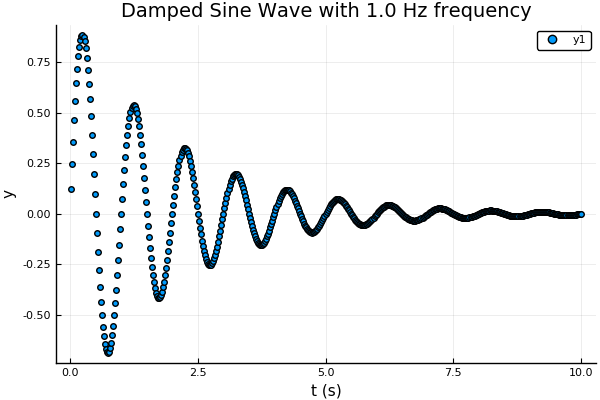

In [28]:
using Plots

t = [i/50 for i in 1:500] #generate values from 0 to 10
f = 1
y = [sin(2*pi*f*i)*exp(-0.5*i) for i in t] # y = sin(2Pi*f*t)*exp(-t/2)

#plotly() # Choose the Plotly.jl backend for web interactivity
#Pkg.add("PyPlot") # Install a different backend
pyplot()  # Switch to using the PyPlot.jl backend
plot(t, y, seriestype=:scatter, xaxis="t (s)", yaxis="y",
     title=@sprintf("Damped Sine Wave with %.1f Hz frequency", f))

**Exercise 1.8.1**
Change *scatter* to *plot*.

**Exercise 1.8.2**
Highligh data points, s.t. $|y|>0.5$ in a different marker colour.

### 1.9 Data Structures

**Exercise 1.9.1** (Demanding question)
Given a list of words, group all of them based on the following similarity metric.


\begin{equation}   
  \mathsf{sim(word_1, word_2)} = \left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if letters in only } \mathsf{word_1} \text{ are used to form } \mathsf{ word_2 } \text{ and vice versa } \textit{(iff)}\\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation}

E.g. 'arts', 'rats', 'star', 'tars' and 'start' are similar words.

Choose an appropriate data structure and analyze computational complexity of your algorithm.

In [21]:
word_list = ["arts", "rats", "star", "tars", "start", "pat", "allergy", "lager", "largely", "regally", "apt", \
             "potters", "tap", "bluest", "tap", "bluets", "retraced", "gallery","bustle", "sublet", "subtle", "grab"]

###########################

## TO DO

LoadError: syntax: missing separator in array expression

Notes: Additionally, read about anagram, regular expressions, grep command and Jaccard similarity

Julia:
* object-oriented
* dynamically typed
* compiled to efficient native code (not interpeted)
* functional programming is supported

## 2. Linear Regression

* Introduction to linear regression and least square

**Advertising Example:**
* Let $X$ and $Y$ be the variables of TV advertising budget and product sales, respectively. $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ be $n$ observation pairs.
* Our target is to estimate a function $f$ such that $f(X)$ can predict $Y$ very well.
* The most common approach involves minimizing the least squares criterion.
* Note that the dataset is downloaded from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv.

### 2.1 Load Advertising Data

In [22]:
# TODO

### 2.2 Linear Regression Model

* If we roughly assume that $f(x)= \beta_0 x + \beta_1$, then our goal is to estimate the coefficients $\beta_0$ and $\beta_1$. Here, the model is linear with respect to the coefficients $\beta_0$ and $\beta_1$.
* Let $\hat{y}_i = \beta_0 x_i + \beta_1$ be the prediction of feature $x_i$, and $e_i = y_i - \hat{y}_i$ represent the difference between the $i$-th observation response value and the response value predicted by our linear model.
* Then, we can estimate the coefficients by minimizing the residual sum of squares (RSS): $RSS = e_1^2 + e_2^2 + \cdots + e_n^2$, or equivalently as,$RSS = (y_1-\beta_0 x_1-\beta_1)^2 + \cdots + (y_n-\beta_0 x_n-\beta_1)^2$.
* It is easy to derive that the minimizers are $\hat{\beta}_0 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$ and $\hat{\beta}_1=\bar{y}-\hat{\beta}_0\bar{x}$, where $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$.

**Exercise 2.2.1** (Derivations of above minimizers)

* Hints: This can be done by setting the gradients to 0. We can obtain 2 gradient equations:
* $\frac{\partial RSS}{\partial \beta_0} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1)x_i = 0$.
* $\frac{\partial RSS}{\partial \beta_1} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1) = 0$.
* Solving above equations, we can get the results. 
* Note that all least square problem can have similar gradient equations.

**Exercise 2.2.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data in above linear model.
* The final result is $\beta_0 = 0.0475$ and $\beta_1=7.03$.

In [23]:
# TODO

### 2.3 Matrix Form
* Denote $\mathbf{x}$ as a design matrix $\begin{bmatrix}
    x_1       & x_2 & x_3 & \dots & x_n \\
    1       & 1 & 1 & \dots & 1
\end{bmatrix}^{\top}$, $\mathbf{y} = [y_1,\cdots,y_n]^{\top}$, $\mathbf{\beta} = [\beta_0,\beta_1]^{\top}$.
* We have the predictions $\hat{\mathbf{y}} = \mathbf{x} \mathbf{\beta}$.
* Then, $RSS = \|\mathbf{y}-\hat{\mathbf{y}}\|_2^2=\|\mathbf{y}- \mathbf{x}\mathbf{\beta}\|_2^2$, where $\|\cdot\|_2$ is $l_2$ norm of a vector.
* If we assume that $\mathbf{x}^{\top}\mathbf{x}$ is non-singular. The minimizers are $\mathbf{\beta}=(\mathbf{x}^{\top}\mathbf{x})^{-1}\mathbf{x}^{\top}\mathbf{y}$.

**Exercise 2.3.1** (Derivations of the minimizers)
* Similarly, we compute the gradient of $RSS$ with respect to $\mathbf{\beta}$. Then, let the gradient be $\mathbf{0}$.

**Exercise 2.3.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data according to above derivations.
* The final result is also $\mathbf{\beta} = [0.0475,7.03]^{\top}$.

In [24]:
# TODO

### 2.4 Gradient Descent Method
* We can also solve this linear regression problem using gradient descent method.
* In gradient decent method, given an objective function $R(\mathbf{\beta})$, such as RSS in above example, we update $\mathbf{\beta}$ as $\mathbf{\beta}^{(k+1)} = \mathbf{\beta}^{(k)}-\lambda^{(k)}\bigtriangledown R(\mathbf{\beta^{(k)}})$. Here, $\lambda^{(k)}$ are the step sizes or learning rates.
* This process will generate a minimizing sequence $\mathbf{\beta}^{(k)}, k=1,2,\cdots$, which satisfy $R(\mathbf{\beta}^{(k+1)}) \leq R(\mathbf{\beta}^{(k)})$. Also, it may finally achieve the optimal minimizer.

**Exercise 2.4.2** (Coefficient Estimation of Advertising Examples)
* To estimate the coefficients for the advertising data using gradient descent method.
* Note that this method can achieve a solution close to above mentioned methods by carefully choosing the learning rate and maximum number of iterations. Using following parameters, the result is $[0.0478, 6.99]^{\top}$.

In [25]:
# TODO

## 3. Logistic Regression
* Introduction to logistic regression. In above advertising example, we try to regress real values of sales by using linear models. Here, we consider the classification problem in which target variable $Y$ are categorical.
* We also let $X$ and $Y$ be the variables of features and targets (labels), respectively. 
* We are often given observations $\{(x_1,y_1),\cdots,(x_n,y_n)\}$. Our target is to learn a classifer $f$ such that $f(X)$ can predict the label $Y$ very well.

**Iris Example:**
* In this example, we try to classify types of iris plant. The dataset is downloaded from UCI Machine Learning Repository.
* The Iris dataset includes three types of iris plant: Setosa, Versicolour, and Virginica. Each type include 50 examples. 
* Here, we load the data for Setosa and Versicolour, and try to distinguish them by training a binary classfier.

### 3.1 Load Iris Data

In [26]:
# TODO

### 3.2 Logistic Regression Model

* In logistic regression, we let the classifier be $f(x,w) = \log \frac{p(y=1|x,w)}{p(y=-1|x,w)}$. We can see, if $p(y=1|x,w)>p(y=-1|x,w)$, $f(x,w)>0$ and $x$ should be classified to $1$; otherwise, $-1$.
* Then, it is easy to get $p(y|x,w)=\frac{1}{1+\exp(-yf(x,w))}$.
* Given the training data $\{(x_1,y_1),\cdots,(x_n,y_n)\}$, we can identify the classifier by maximize the likelihood, i.e., $ML=\Pi_{i=1}^n p(y_i|x_i,w)=\Pi_{i=1}^n \frac{1}{1+\exp(-y_if(x_i,w))}$; or equivalently, by minimizing the negative log likelihood (NLL), i.e., $NLL=\sum_{i=1}^n \log(1+\exp(-y_if(x_i,w)))$.
* In the iris example, we also assume that $f$ is linear with respect to parameters $w$; that is, $f(x,w)=w^{\top}x$.
* In order to train the classifier, we often use the gradient descent method.

**Exercise 2.4.2** (Estimating Parameters of Iris Example)
* To estimate the parameters by using the gradient descent method.
* Note that learning rate and maxiter should be tuned to achieve best results. The linear classifier may not work well.

In [27]:
# TODO

## Next Week

* Learn to use a convex optimization toolbox.